## Audio Augmented Dataset 

The idea of overlaying audio is change the `loudness` of object audio(e.g.vehicle) to be equal to the base audio(environment). Then, random apply gain to the object audio before doing the overlay.

#### Setup

In [1]:
import os
import random
from pydub import AudioSegment

tgt_path = "I:/datasets/vehicle/dataset/v1/train_set/vehicle"
env_path = "I:/datasets/vehicle/random_environment/before_augmented/vehicle"
dst_path = "I:/datasets/vehicle/random_environment/augmentedv2/vehicle"

# tgt_path = "./mini_set/vehicle"
# env_path = "./mini_set/environment"
# dst_path = "./mini_set/augmented_vehicle"


tgt_files = os.listdir(tgt_path)
env_files = os.listdir(env_path)

if not os.path.exists(dst_path):
    os.makedirs(dst_path)
    print("Create:", dst_path)

Create: I:/datasets/vehicle/random_environment/augmentedv2/vehicle


#### Overlay the audio

In [7]:
# Audio gain range apply to the target audio. the more the louder, the less the quieter
# gain_min = -10
# gain_max = 0

In [2]:
def custom_apply_gain(base_decibel, audio, gain):
    # Set the audio loudness equal to the base_decibel
    decibel_differential = base_decibel - audio.dBFS
    audio = audio.apply_gain(decibel_differential)
    # Apply gain to the audio
    return audio.apply_gain(gain)


In [3]:
# Loop over the environment audio: apply gain and overlay
for i, env_file in enumerate(env_files):
    try:
        tgt_file = random.choice(tgt_files)
        tgt_audio = AudioSegment.from_file(tgt_path + '/' + tgt_file)
        env_audio = AudioSegment.from_file(env_path + '/' + env_file)

        # Gain base is from 20% decibel of environment. Gain value need to be integer.
        gain_base = int(abs(env_audio.dBFS * 0.2))

        gain = random.randint(0, gain_base)

        gained_audio = custom_apply_gain(env_audio.dBFS, tgt_audio, gain)

        overlay_audio = env_audio.overlay(gained_audio)
        overlay_audio.export("{}/{}".format(dst_path, env_file),format='wav')

        if(i%1000 == 0):
            print("Success:", i, "files", abs(env_audio.dBFS * 0.2), gain_base)
    except:
        print(env_file)
        pass

print("Finish the task")


Success: 0 files 9.619440898641876 9
Success: 1000 files 13.606026330611526 13
0b090a14-1786-4626-bd5f-454526c72989_71-73.wav
Success: 2000 files 6.820869667858535 6
Success: 3000 files 8.336344683202922 8
Success: 4000 files 7.258984871258794 7
Success: 5000 files 8.052091259901141 8
Success: 6000 files 10.406544330304005 10
Success: 7000 files 8.014266295923372 8
Success: 8000 files 13.140004054325775 13
Success: 9000 files 10.323805934864602 10
Success: 10000 files 4.623975659354925 4
Success: 11000 files 6.000360718202015 6
Success: 12000 files 8.13602922582965 8
Success: 13000 files 8.159114986541153 8
Success: 14000 files 10.114712802773894 10
Success: 15000 files 9.234496235711473 9
Success: 16000 files 6.53170158801935 6
Success: 17000 files 7.602210875706333 7
Success: 18000 files 7.02312836108035 7
Success: 19000 files 9.688112999189933 9
Success: 20000 files 7.515848154425409 7
Success: 21000 files 8.562806355798456 8
Success: 22000 files 9.191863962983247 9
Success: 23000 f

#### Visualize

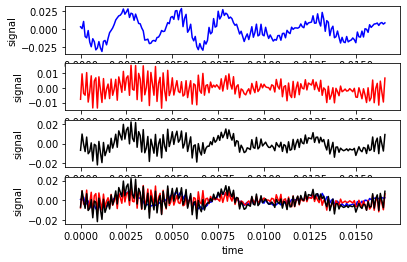

In [32]:
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

tgt_sample = tgt_path + '/' + tgt_files[0]
env_sample = env_path + '/' + env_files[0]
gain_sample = './mini_set/apply_gain_sample.wav'
overlay_sample = './mini_set/overlay_sample.wav'

tgt = AudioSegment.from_file(tgt_sample) 
env = AudioSegment.from_file(env_sample)
tgt = custom_apply_gain(env.dBFS, tgt, 0)
tgt.export(gain_sample, format='wav')
combined = env.overlay(tgt)
combined.export(overlay_sample, format='wav')

tgt_data, tgt_sr = sf.read(tgt_sample)
env_data, env_sr = sf.read(env_sample)
gain_data, gain_sr = sf.read(gain_sample)
overlay_data, overlay_sr = sf.read(overlay_sample)

time = np.arange(len(tgt_data)) / float(tgt_sr)

# Target/Object wave
plt.figure()
plt.subplot(4, 1, 1)
plt.plot(time[:200], tgt_data[:200], 'b')
plt.ylabel('signal')

# Environment wave
plt.subplot(4, 1, 2)
plt.plot(time[:200], env_data[:200], 'r')
plt.ylabel('signal')

# Overlay wave
plt.subplot(4, 1, 3)
plt.plot(time[:200], overlay_data[:200], 'k')
plt.ylabel('signal')

# All wave
plt.subplot(4, 1, 4)
plt.plot(time[:200], gain_data[:200], 'b')
plt.plot(time[:200], env_data[:200], 'r')
plt.plot(time[:200], overlay_data[:200], 'k')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()